#MNIST Dataset# 

Author: Yann LeCun, Corinna Cortes, Christopher J.C. Burges   
Link (original): http://yann.lecun.com/exdb/mnist/    
Link (CSV): https://www.kaggle.com/oddrationale/mnist-in-csv?select=mnist_train.csv



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import keras 
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Dropout, Flatten, AveragePooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.utils.np_utils import to_categorical

from sklearn.metrics import accuracy_score, f1_score

##1. Read dataset##
- Using Pandas library   
- Split X_train, y_train, X_test, y_test   
- Visualization 1 datapoint 
- Transform data 

In [ ]:
# Read
train = pd.read_csv('/content/drive/MyDrive/Google Colab/DeepLearning trong Khoa Học Dữ Liệu/mnist_train.csv')
test = pd.read_csv('/content/drive/MyDrive/Google Colab/DeepLearning trong Khoa Học Dữ Liệu/mnist_test.csv')

In [ ]:
# Split 
X_train = train.drop(['label'], axis=1)
y_train = train[['label']]

X_test = test.drop(['label'], axis=1)
y_test = test[['label']]

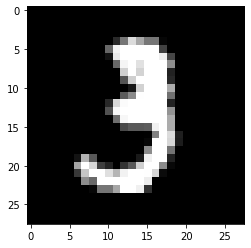

In [ ]:
# Visualize
sample = X_train.iloc[10, :]
sample = sample.values.reshape([28,28])
plt.imshow(sample, cmap='gray')

In [ ]:
# Transform data : reshape  
X_train = np.array(X_train)
X_test = np.array(X_test)

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

##2. LeNet5 ##
- Define layers
- Summarise model: layer's configuration, parameters summarization  
- Traning

In [ ]:
# Model definition
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(AveragePooling2D(strides=2, pool_size=(2, 2)))
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(AveragePooling2D(strides=2, pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Summarization
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [ ]:
# Training
model.fit(X_train, to_categorical(y_train))

1875/1875 [==============================] - 39s 21ms/step - loss: 0.0502 - accuracy: 0.9370


##3. Testing ##  
- Predict X_test   
- Checking accuracy & f1-macro score  

In [ ]:
# Predict X_test 
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = -1)

In [ ]:
# Evaluation
print("accuracy: " + str(accuracy_score(y_pred, y_test)))
print("f1-score: " + str(f1_score(y_pred, y_test, average='macro')))

accuracy: 0.9773
f1-score: 0.977120134059019


##4. Alex, ZFNET & VGG-16: ##

In [ ]:
def alex(x_train, x_test, y_train, y_test):
    # Model definition 
    model = Sequential()
    model.add(Conv2D(filters=96, strides=4, kernel_size=(11,11), padding='valid', activation='relu', input_shape=(28, 28, 1)))
    model.add(keras.layers.MaxPooling2D(pool_size=(3, 3), strides=2, padding="same"))
    model.add(keras.layers.LayerNormalization(axis=3))

    model.add(Conv2D(filters=256, strides=1, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(3, 3), strides=2, padding="same"))
    model.add(keras.layers.LayerNormalization(axis=3))

    model.add(Conv2D(filters=384, strides=1, kernel_size=(3,3), padding='same', activation='relu'))

    model.add(Conv2D(filters=384, strides=1, kernel_size=(3,3), padding='same', activation='relu'))

    model.add(Conv2D(filters=256, strides=1, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(3, 3), strides=2, padding="same"))
    model.add(Flatten())

    model.add(Dense(4096, activation='relu'))
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    model.fit(x_train, to_categorical(y_train))
    y_pred = model.predict(x_test)
    y_pred = np.argmax(y_pred, axis = -1)
    acc_score = accuracy_score(y_pred, y_test)
    f1 = f1_score(y_pred, y_test, average='macro')
    return model, acc_score, f1

In [ ]:
alex_model, alex_acc_score, alex_f1_score = alex(X_train, X_test, y_train, y_test)

1875/1875 [==============================] - 998s 532ms/step - loss: 0.0681 - accuracy: 0.8695


In [ ]:
alex_acc_score, alex_f1_score

(0.9658, 0.9656223428826411)

In [ ]:
def zfnet(x_train, x_test, y_train, y_test):
    # Model definition 
    model = Sequential()
    model.add(Conv2D(filters=96, strides=2, kernel_size=(7,7), padding='valid', activation='relu', input_shape=(28, 28, 1)))
    model.add(keras.layers.MaxPooling2D(pool_size=(3, 3), strides=2, padding="same"))
    model.add(keras.layers.LayerNormalization(axis=3))

    model.add(Conv2D(filters=256, strides=2, kernel_size=(5,5), padding='valid', activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(3, 3), strides=2, padding="same"))
    model.add(keras.layers.LayerNormalization(axis=3))

    model.add(Conv2D(filters=384, strides=1, kernel_size=(3,3), padding='same', activation='relu'))

    model.add(Conv2D(filters=384, strides=1, kernel_size=(3,3), padding='same', activation='relu'))

    model.add(Conv2D(filters=256, strides=1, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(3, 3), strides=2, padding="same"))
    model.add(Flatten())

    model.add(Dense(4096, activation='relu'))
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    model.fit(x_train, to_categorical(y_train))
    y_pred = model.predict(x_test)
    y_pred = np.argmax(y_pred, axis = -1)
    acc_score = accuracy_score(y_pred, y_test)
    f1 = f1_score(y_pred, y_test, average='macro')
    return model, acc_score, f1

In [ ]:
zfnet_model, zfnet_acc_score, zfnet_f1_score = zfnet(X_train, X_test, y_train, y_test)

1875/1875 [==============================] - 909s 485ms/step - loss: 0.0454 - accuracy: 0.9199


In [ ]:
zfnet_acc_score, zfnet_f1_score

(0.9706, 0.9703044352667298)

In [ ]:
def vgg16(x_train, x_test, y_train, y_test):
    # Model definition  
    model = Sequential()
    model.add(Conv2D(filters=64, strides=1, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28, 28, 1)))
    model.add(Conv2D(filters=64, strides=1, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="same"))
    
    model.add(Conv2D(filters=128, strides=1, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Conv2D(filters=128, strides=1, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="same"))
    
    model.add(Conv2D(filters=256, strides=1, kernel_size=(3,3), padding='valid', activation='relu'))
    model.add(Conv2D(filters=256, strides=1, kernel_size=(3,3), padding='valid', activation='relu'))
    model.add(Conv2D(filters=256, strides=1, kernel_size=(3,3), padding='valid', activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="same"))
    
    model.add(Conv2D(filters=512, strides=1, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Conv2D(filters=512, strides=1, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Conv2D(filters=512, strides=1, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="same"))
    
    model.add(Conv2D(filters=512, strides=1, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Conv2D(filters=512, strides=1, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Conv2D(filters=512, strides=1, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding="same"))
    
    model.add(Flatten())
    
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(4096, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    model.fit(x_train, to_categorical(y_train))
    y_pred = model.predict(x_test)
    y_pred = np.argmax(y_pred, axis = -1)
    acc_score = accuracy_score(y_pred, y_test)
    f1 = f1_score(y_pred, y_test, average='macro')
    return model, acc_score, f1

In [ ]:
vgg16_model, vgg16_acc_score, vgg16_f1_score = vgg16(X_train, X_test, y_train, y_test)

1875/1875 [==============================] - 3343s 2s/step - loss: 0.3252 - accuracy: 0.1110


In [ ]:
vgg16_acc_score, vgg16_f1_score

(0.1135, 0.0203861697350696)